# Poisoned Mushroom Dataset

We are going to take a quick tour of machine learning by working on an example dataset. The mushroom dataset
categorizes mushrooms as 'poisonous' or 'edible' and collects several descriptive properties of each mushroom example.

In [43]:
import pandas as pd
import os
from sklearn.metrics import roc_curve, roc_auc_score, auc


## Loading the dataset

In [5]:
# data_root = "/home/pewhite/github/aet-cs/ML-datasets/"
filename = "mushroom.csv"
# filepath = os.path.join(data_root, filename)
df = pd.read_csv(filename)
df

,class,cap-shape,cap-surface,cap-color,ruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,e,x,f,n,f,n,f,w,n,b,...,y,w,p,NaN,n,o,p,w,v,NaN
1,p,NaN,y,g,t,NaN,f,c,b,k,...,s,n,c,p,w,n,e,NaN,y,g
2,e,b,y,n,t,n,f,c,NaN,n,...,s,p,NaN,p,w,o,p,b,y,w
3,e,x,g,g,t,n,f,w,b,n,...,s,p,NaN,p,w,n,n,NaN,NaN,d
4,e,NaN,f,NaN,t,n,a,w,n,n,...,k,NaN,w,p,w,NaN,l,w,v,d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25981,e,f,NaN,r,f,n,f,NaN,n,NaN,...,NaN,n,p,p,w,o,p,k,v,NaN
25982,e,f,s,e,f,NaN,f,c,n,y,...,y,w,p,p,w,NaN,p,r,y,d
25983,p,f,g,e,NaN,NaN,a,c,b,b,...,y,w,NaN,p,w,o,p,h,v,m
25984,e,x,g,g,t,n,f,w,b,h,...,f,NaN,NaN,p,w,t,e,NaN,s,NaN


In [7]:
df.describe()

,class,cap-shape,cap-surface,cap-color,ruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,25986,22513,22507,22527,22514,22536,22505,22587,22494,22418,...,22563,22413,22553,22489,22483,22497,22478,22493,22475,22502
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,14354,7674,7602,4810,12361,6986,17811,16092,13997,3679,...,10619,8580,8403,22489,15742,15713,8501,5085,8409,6573


## Data Exploration

In [8]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'ruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [9]:
df['class']

0        e
1        p
2        e
3        e
4        e
        ..
25981    e
25982    e
25983    p
25984    e
25985    e
Name: class, Length: 25986, dtype: object

In [10]:
df.shape

(25986, 23)

In [11]:
df['class'].describe()

count     25986
unique        2
top           e
freq      14354
Name: class, dtype: object

In [12]:
df['class'].value_counts()

class
e    14354
p    11632
Name: count, dtype: int64

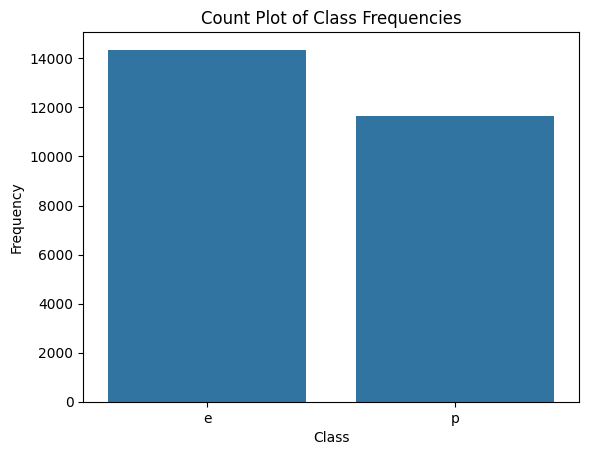

In [13]:
import seaborn as sns
from matplotlib import pyplot as plt

# Count plot
sns.countplot(x='class', data=df)
plt.title('Count Plot of Class Frequencies')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()


In [14]:
import pandas as pd
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()
df['cap-color-encoded'] = le.fit_transform(df['cap-color'])
df['class-encoded'] = LabelEncoder().fit_transform(df['class'])

In [16]:
print(list(zip(le.classes_, le.transform(le.classes_))))

[('b', np.int64(0)), ('c', np.int64(1)), ('e', np.int64(2)), ('g', np.int64(3)), ('n', np.int64(4)), ('p', np.int64(5)), ('r', np.int64(6)), ('u', np.int64(7)), ('w', np.int64(8)), ('y', np.int64(9)), (nan, np.int64(10))]


In [17]:
df['cap-color-encoded'].describe()

count    25986.000000
mean         5.209074
std          3.120868
min          0.000000
25%          3.000000
50%          4.000000
75%          8.000000
max         10.000000
Name: cap-color-encoded, dtype: float64

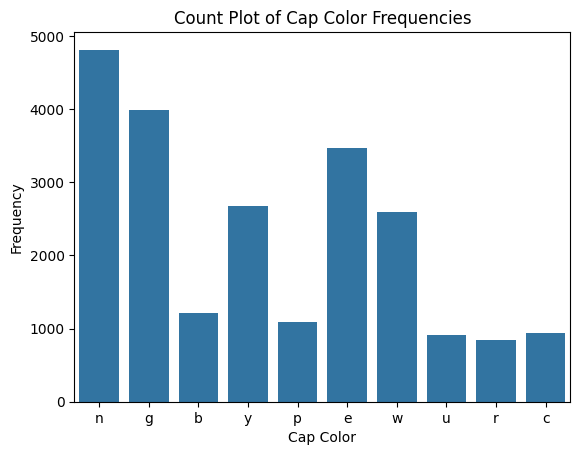

In [18]:
# Count plot
sns.countplot(x='cap-color', data=df, )
plt.title('Count Plot of Cap Color Frequencies')
plt.xlabel('Cap Color')
plt.ylabel('Frequency')
plt.show()


In [19]:
# Count observations by color and toxicity
counts = df.groupby(['cap-color-encoded', 'class']).size().reset_index(name='count')

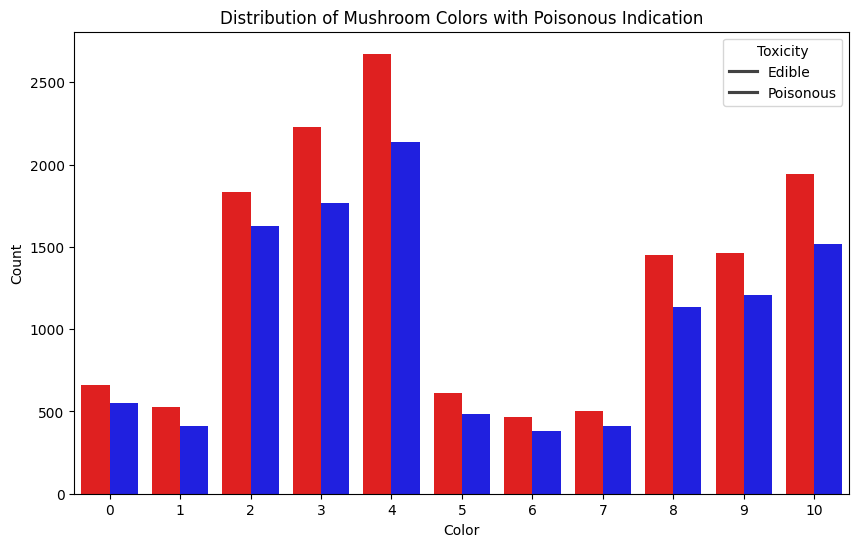

In [20]:
# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='cap-color-encoded', y='count', hue='class', data=counts, palette={'p': 'blue', 'e': 'red'})

# Add plot title and labels
plt.title('Distribution of Mushroom Colors with Poisonous Indication')
plt.xlabel('Color')
plt.ylabel('Count')
plt.legend(title='Toxicity', labels=['Edible', 'Poisonous'])

# Show the plot
plt.show()

In [21]:
dff = df[df['cap-color-encoded']<10]
chi2(dff[['cap-color-encoded']],dff['class-encoded'])

(array([1.17609317]), array([0.27815279]))

In [22]:
dff.describe()

,cap-color-encoded,class-encoded
count,22527.000000,22527.000000
mean,4.473432,0.449061
std,2.677623,0.497410
min,0.000000,0.000000
25%,3.000000,0.000000
50%,4.000000,0.000000
75%,7.000000,1.000000
max,9.000000,1.000000


In [23]:
# Count observations by color and toxicity
counts = df.groupby(['odor', 'class']).size().reset_index(name='count')

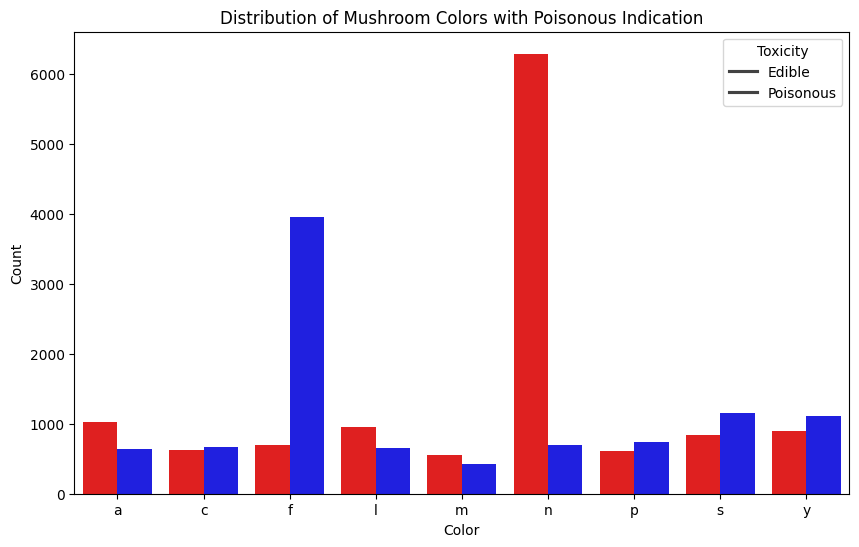

In [24]:
# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='odor', y='count', hue='class', data=counts, palette={'p': 'blue', 'e': 'red'})

# Add plot title and labels
plt.title('Distribution of Mushroom Colors with Poisonous Indication')
plt.xlabel('Color')
plt.ylabel('Count')
plt.legend(title='Toxicity', labels=['Edible', 'Poisonous'])

# Show the plot
plt.show()

In [25]:
le = LabelEncoder()
df['odor-encoded'] = le.fit_transform(df['odor'])

In [26]:
print(list(zip(le.classes_, le.transform(le.classes_))))

[('a', np.int64(0)), ('c', np.int64(1)), ('f', np.int64(2)), ('l', np.int64(3)), ('m', np.int64(4)), ('n', np.int64(5)), ('p', np.int64(6)), ('s', np.int64(7)), ('y', np.int64(8)), (nan, np.int64(9))]


In [27]:
chi2(df[['odor-encoded']],df['class-encoded'])

(array([500.23469597]), array([8.45094378e-111]))

<Axes: >

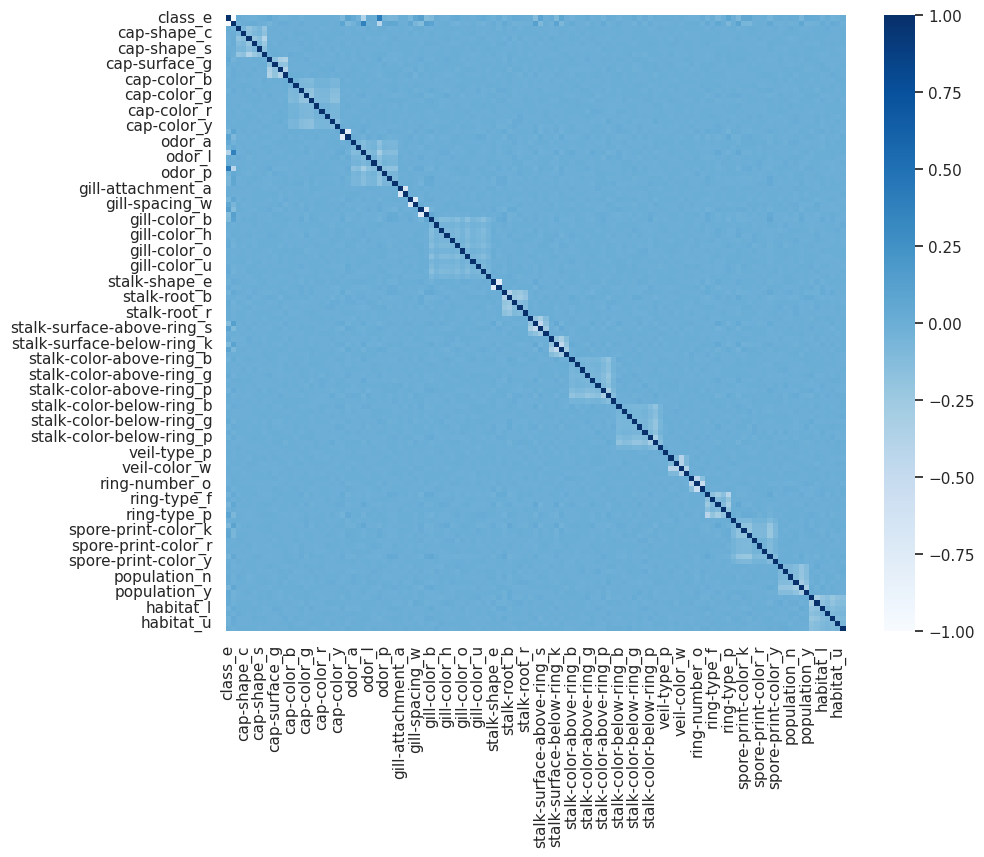

In [29]:
import seaborn as sns

df = pd.read_csv(filename)
mushrooms_encoded = pd.get_dummies(df)
corr = mushrooms_encoded.corr()
sns.set(rc={'figure.figsize': (10, 8)})
sns.heatmap(corr, cmap="Blues")

In [30]:
corr.class_p[abs(corr.class_p)>0.1]

class_e                      -1.000000
class_p                       1.000000
odor_f                        0.377583
odor_n                       -0.423318
gill-size_b                  -0.122242
gill-size_n                   0.122991
stalk-surface-above-ring_k    0.125727
Name: class_p, dtype: float64

## Data Modeling

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv(filename)
X = df.drop('class', axis = 1)
y = df['class']

X = pd.get_dummies(X)

### Decision Tree Classifier

In [33]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=10, criterion='entropy',class_weight = {'p':100, 'e':0.1})

# Fit the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.671219699884571
Classification Report:
              precision    recall  f1-score   support

           e       0.69      0.73      0.71      2873
           p       0.64      0.60      0.62      2325

    accuracy                           0.67      5198
   macro avg       0.67      0.66      0.67      5198
weighted avg       0.67      0.67      0.67      5198



In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix(y_test, y_pred)

array([[2086,  787],
       [ 922, 1403]])

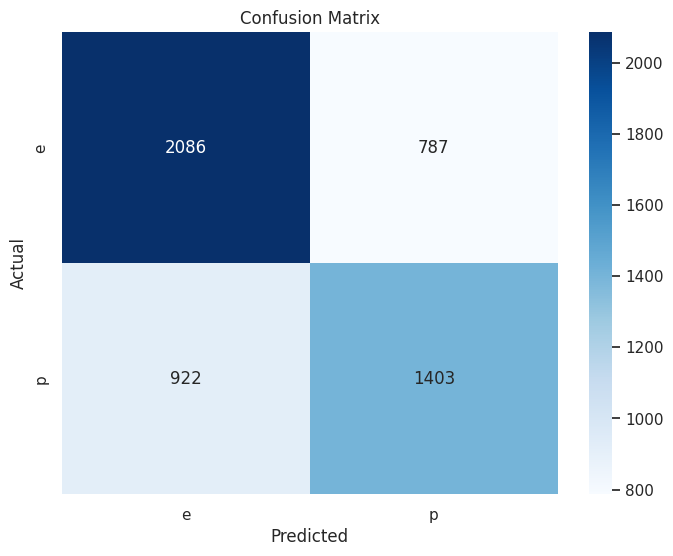

In [35]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Decision Tree Classifier ROC Curve

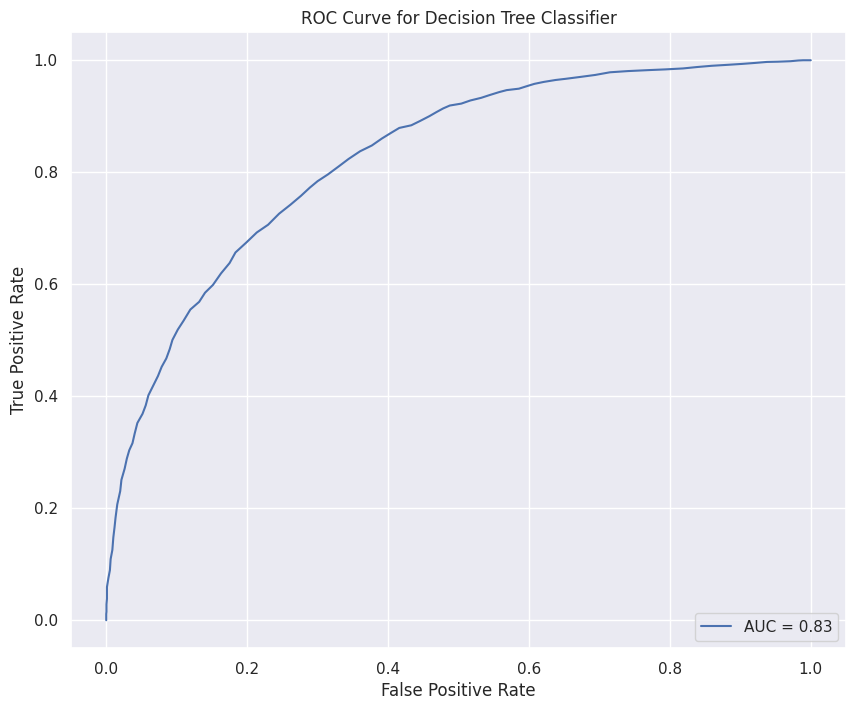

In [56]:
probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds, pos_label='p')
roc_auc = auc(fpr, tpr)


plt.title('ROC Curve for Decision Tree Classifier')
plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Testing more methods

In [60]:

def classifier_tryout(clf, X_train, y_train, X_test, y_test, name):
	clf.fit(X_train, y_train)

	# Make predictions
	y_pred = clf.predict(X_test)

	# Evaluate the model
	accuracy = accuracy_score(y_test, y_pred)
	print(f"Accuracy: {accuracy}")

	print("Classification Report:")
	print(classification_report(y_test, y_pred))

	probs = clf.predict_proba(X_test)
	preds = probs[:,1]
	fpr, tpr, threshold = roc_curve(y_test, preds, pos_label='p')
	roc_auc = auc(fpr, tpr)


	plt.title('ROC Curve for ' + name)
	plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
	plt.legend(loc = 'lower right')
	plt.ylabel('True Positive Rate')
	plt.xlabel('False Positive Rate')
	plt.show()

### Random Forest

Accuracy: 0.7418237783762985
Classification Report:
              precision    recall  f1-score   support

           e       0.77      0.75      0.76      2873
           p       0.71      0.73      0.72      2325

    accuracy                           0.74      5198
   macro avg       0.74      0.74      0.74      5198
weighted avg       0.74      0.74      0.74      5198



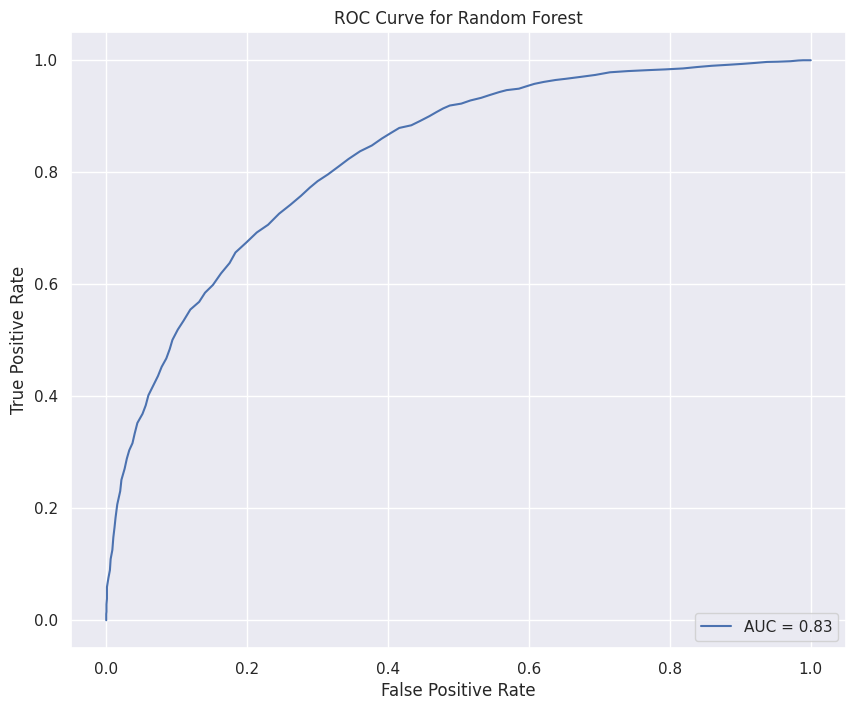

In [61]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42, class_weight={'e':100, 'p':1})
classifier_tryout(clf, X_train, y_train, X_test, y_test, 'Random Forest')

### Support Vector Machines

In [ ]:
# from sklearn.svm import SVC

# # Initialize the RandomForestClassifier
# clf = SVC(random_state=42, kernel='rbf')
# classifier_tryout(clf, X_train, y_train, X_test, y_test, "Support Vector Machines")

Accuracy: 0.749134282416314
Classification Report:
              precision    recall  f1-score   support

           e       0.76      0.80      0.78      2873
           p       0.73      0.69      0.71      2325

    accuracy                           0.75      5198
   macro avg       0.75      0.74      0.74      5198
weighted avg       0.75      0.75      0.75      5198



AttributeError: This 'SVC' has no attribute 'predict_proba'

### Logistic Regression

Accuracy: 0.746056175452097
Classification Report:
              precision    recall  f1-score   support

           e       0.76      0.78      0.77      2873
           p       0.72      0.70      0.71      2325

    accuracy                           0.75      5198
   macro avg       0.74      0.74      0.74      5198
weighted avg       0.75      0.75      0.75      5198



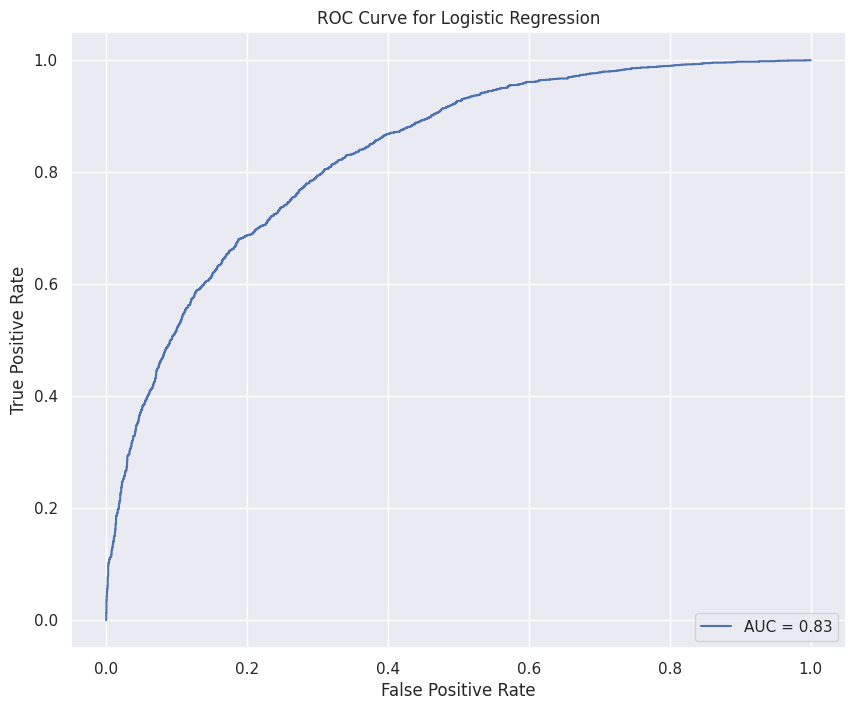

In [63]:
from sklearn.linear_model import LogisticRegression

# Initialize the LogisticRegression
clf = LogisticRegression(random_state=42)
classifier_tryout(clf, X_train, y_train, X_test, y_test, "Logistic Regression")

### k-Nearest Neighbors

Accuracy: 0.6854559445940747
Classification Report:
              precision    recall  f1-score   support

           e       0.70      0.76      0.73      2873
           p       0.67      0.60      0.63      2325

    accuracy                           0.69      5198
   macro avg       0.68      0.68      0.68      5198
weighted avg       0.68      0.69      0.68      5198



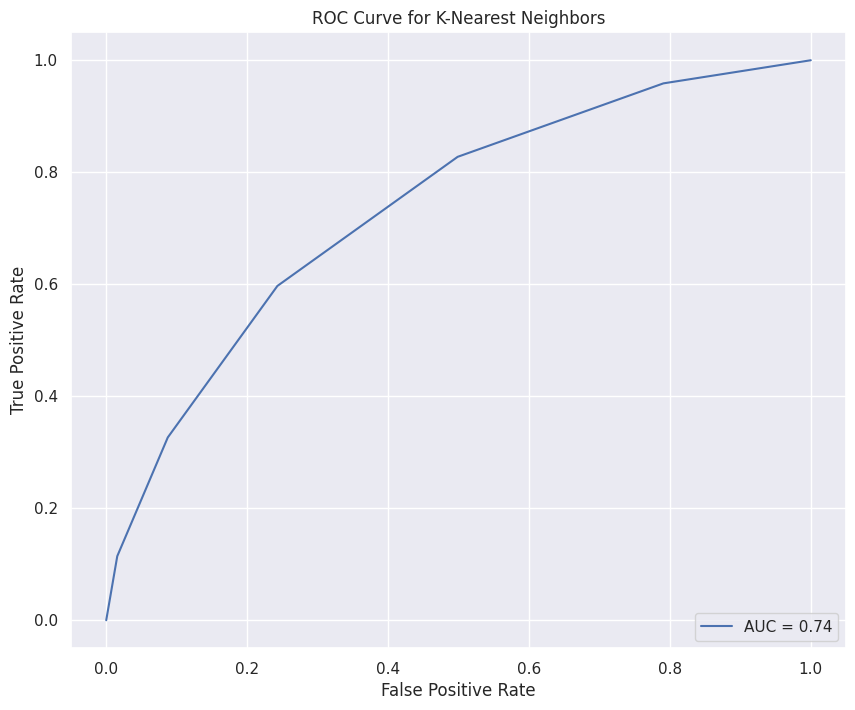

In [64]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNeighborsClassifier
clf = KNeighborsClassifier(weights='uniform')
classifier_tryout(clf, X_train, y_train, X_test, y_test, "K-Nearest Neighbors")

### GradientBoost 

Accuracy: 0.7518276260100039
Classification Report:
              precision    recall  f1-score   support

           e       0.77      0.79      0.78      2873
           p       0.73      0.70      0.72      2325

    accuracy                           0.75      5198
   macro avg       0.75      0.75      0.75      5198
weighted avg       0.75      0.75      0.75      5198



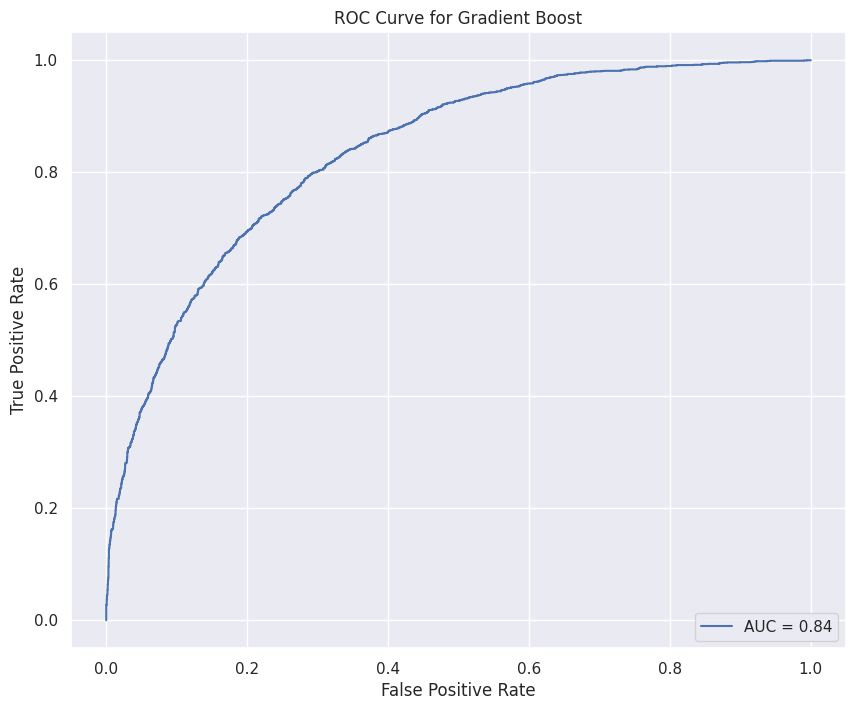

In [65]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=42)
classifier_tryout(clf, X_train, y_train, X_test, y_test, "Gradient Boost")

### Neural Network

In [ ]:
# from sklearn.neural_network import MLPClassifier

# # Initialize the MLPClassifier
# clf = MLPClassifier(random_state=42, hidden_layer_sizes=(1000,10,), learning_rate='adaptive')
# classifier_tryout(clf, X_train, y_train, X_test, y_test, "Neural Network")

# All ROC Curves

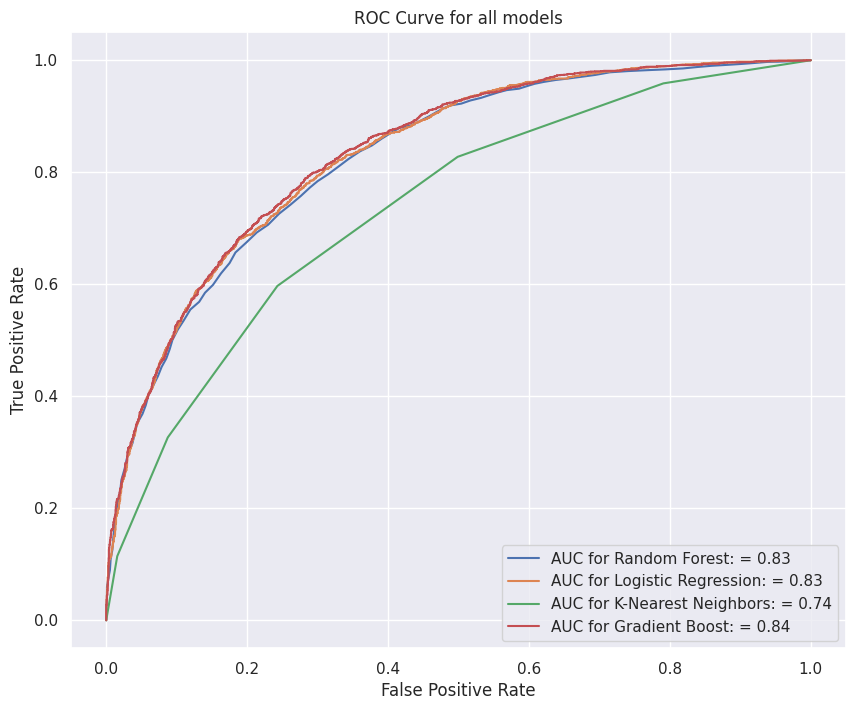

In [69]:
clf1 = RandomForestClassifier(random_state=42, class_weight={'e':100, 'p':1})
clf2 = LogisticRegression(random_state=42)
clf3 = KNeighborsClassifier(weights='uniform')
clf4 = GradientBoostingClassifier(random_state=42)
names = ["Random Forest", "Logistic Regression", "K-Nearest Neighbors", "Gradient Boost"]
models = [clf1, clf2, clf3, clf4]

for name, model in zip(names, models):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = roc_curve(y_test, preds, pos_label='p')
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label = 'AUC for ' + name + ': = %0.2f' % roc_auc)
    
plt.title('ROC Curve for all models')
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Analysis + Cross Validation of Random Forest

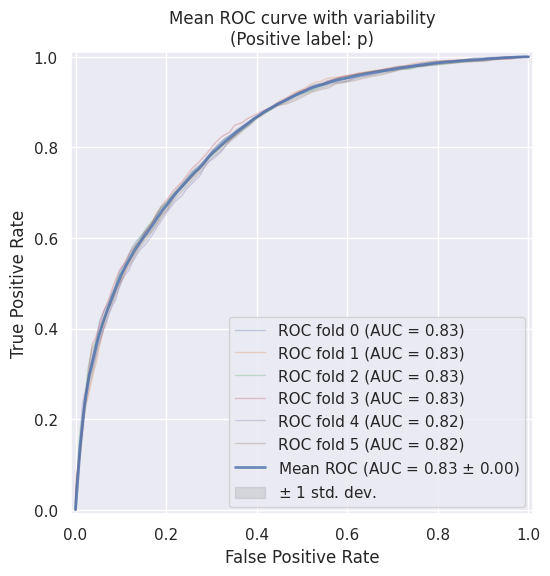

In [83]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay, auc
from sklearn.model_selection import StratifiedKFold

# Assuming X and y are already defined
n_splits = 6
cv = StratifiedKFold(n_splits=n_splits)
clf = RandomForestClassifier(class_weight={'e':100, 'p':1})

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(cv.split(X, y)):
    # print(train)
    clf.fit(X.loc[train], y.loc[train])
    viz = RocCurveDisplay.from_estimator(
        clf,
        X.loc[test],
        y.loc[test],
        name=f"ROC fold {fold}",
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

# Plot the mean ROC curve
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

# Plot the standard deviation around the mean ROC curve
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"Mean ROC curve with variability\n(Positive label: p)",
)
ax.legend(loc="lower right")
plt.show()


## Tuning Random Forest Classifier

In [90]:
from sklearn.model_selection import TunedThresholdClassifierCV
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import cross_val_score

scorer = make_scorer(f1_score, pos_label='p')
clf = RandomForestClassifier(class_weight={'e':100, 'p':1})
print("Old Score:", float(np.mean(cross_val_score(clf, X_train, y_train, cv=100, scoring='accuracy'))))
model = TunedThresholdClassifierCV(clf, scoring=scorer)
print("Tuned Score:", float(scorer(model.fit(X_train, y_train), X_test, y_test)))

Old Score: 0.7441308992939429
Tuned Score: 0.7330812854442345


Accuracy: 0.7206617929973067
Classification Report:
              precision    recall  f1-score   support

           e       0.84      0.61      0.71      2873
           p       0.64      0.86      0.73      2325

    accuracy                           0.72      5198
   macro avg       0.74      0.73      0.72      5198
weighted avg       0.75      0.72      0.72      5198



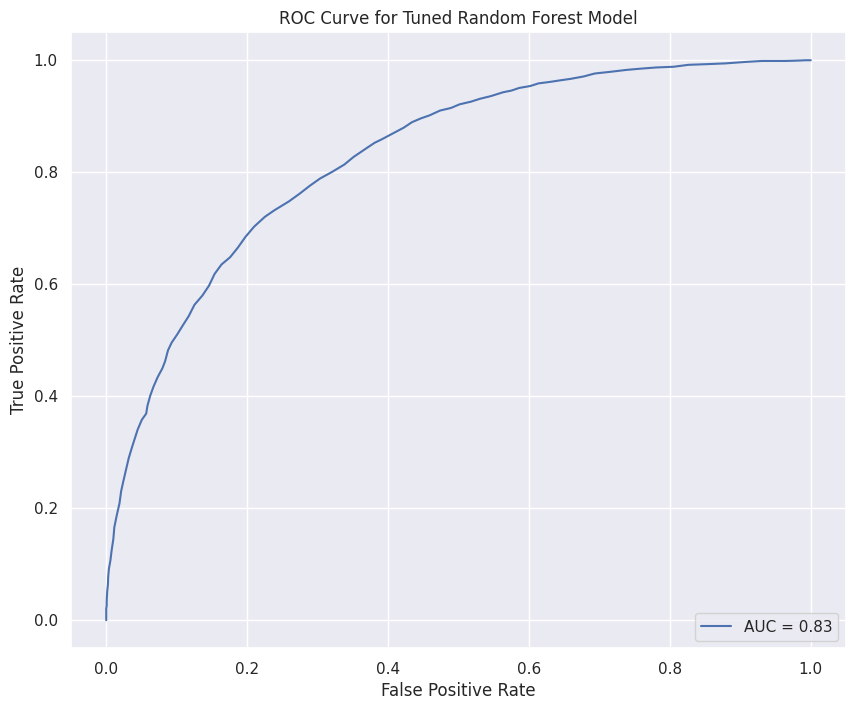

In [91]:
classifier_tryout(model, X_train, y_train, X_test, y_test, 'Tuned Random Forest Model')